## SGDの実装
### ワイン178本のデータを使用し、未知のワインの色とプロリン（アミノ酸の一種）の量の2変数から、その未知のワインが3つのブドウ品種のどれから作られたのかを識別する識別器を作成する

In [524]:
import warnings
warnings.filterwarnings('ignore')

In [525]:
#解説 1：ライブラリのインポート--------------------------------
import numpy as np #numpyという行列などを扱うライブラリを利用
import pandas as pd #pandasというデータ分析ライブラリを利用
import matplotlib.pyplot as plt #プロット用のライブラリを利用
from sklearn import linear_model, metrics, preprocessing, cross_validation #機械学習用のライブラリを利用
from mlxtend.plotting import plot_decision_regions #学習結果をプロットする外部ライブラリを利用

In [526]:
#解説 2：Wineのデータセットを読み込む--------------------------------
df_wine_all=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
#品種(0列、1～3)と色（10列）とプロリンの量(13列)を使用する
df_wine=df_wine_all[[0,10,13]]
df_wine.columns = [u'class', u'color', u'proline']
# pd.DataFrame(df_wine)  #この行を実行するとデータが見れる

<function matplotlib.pyplot.show(*args, **kw)>

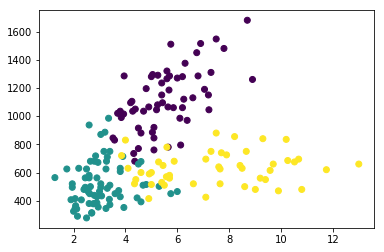

In [527]:
#解説 3：プロットしてみる------------------------------------------------------
%matplotlib inline
x=df_wine["color"]
y=df_wine["proline"]
z=df_wine["class"]-1
plt.scatter(x,y, c=z)
plt.show

In [528]:
#解説 4：データの整形-------------------------------------------------------
X=df_wine[["color","proline"]]
sc=preprocessing.StandardScaler()
sc.fit(X)
X_std=sc.transform(X)

In [529]:
#解説 5：機械学習で分類する---------------------------------------------------
clf_result=linear_model.SGDClassifier(loss="hinge") #loss="hinge", loss="log"

In [530]:
#解説 6：K分割交差検証（cross validation）で性能を評価する---------------------
scores=cross_validation.cross_val_score(clf_result, X_std, z, cv=10)
print("平均正解率 = ", scores.mean())
print("正解率の標準偏差 = ", scores.std())

平均正解率 =  0.8724114207086343
正解率の標準偏差 =  0.09247391452131157


In [531]:
#解説 7：トレーニングデータとテストデータに分けて実行してみる------------------
X_train, X_test, train_label, test_label=cross_validation.train_test_split(X_std, z, test_size=0.1, random_state=0)
clf_result.fit(X_train, train_label)
#正答率を求める
pre=clf_result.predict(X_test)
ac_score=metrics.accuracy_score(test_label,pre)
print("正答率 = ",ac_score)

正答率 =  0.8888888888888888


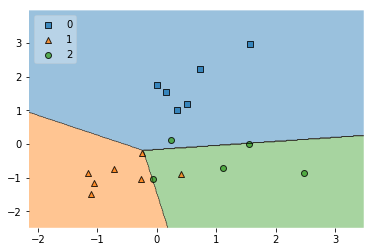

In [532]:
#plotする
X_train_plot=np.vstack(X_train)
train_label_plot=np.hstack(train_label)
X_test_plot=np.vstack(X_test)
test_label_plot=np.hstack(test_label)
#plot_decision_regions(X_train_plot, train_label_plot, clf=clf_result, res=0.01) #学習データをプロット
plot_decision_regions(X_test_plot, test_label_plot, clf=clf_result, res=0.01, legend=2) #テストデータをプロット

In [533]:
#解説 8：任意のデータに対する識別結果を見てみる------------------
#predicted_label=clf_result.predict([1,-1])
#print("このテストデータのラベル = ", predicted_label)

In [534]:
#解説 9：識別平面の式を手に入れる--------------------------------
print(clf_result.intercept_)
print(clf_result.coef_ )  #coef[0]*x+coef[1]*y+intercept=0

[  2.0493807  -10.29182953  -3.42065871]
[[  1.47133935  26.50098413]
 [-20.85162875 -11.41933507]
 [  5.45822046  -6.67345269]]


## 別のデータでSGD！　これは回帰のSGDReggresor　と　分類のSGDClassifier　どちらも試している。

In [535]:
from sklearn import preprocessing, metrics

df_a = train_x.copy()

In [536]:
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier

sgd_reg = SGDRegressor(n_iter=5000, penalty=None, eta0=0.1)
sgd_cla = SGDClassifier(n_iter=5000, penalty=None, eta0=0.1)

In [537]:
sc_a = preprocessing.StandardScaler()
sc_a.fit(df_a)
a_std = sc_a.transform(df_a)
b_std = a_std.copy()

sgd_reg.fit(a_std, train_y)
sgd_cla.fit(b_std, train_y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=5000,
       n_jobs=1, penalty=None, power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [538]:
a_std, test_x_a, train_y_a, test_y_a = cross_validation.train_test_split(a_std, train_y, test_size=0.1, random_state=0)
b_std, test_x_b, train_y_b, test_y_b = cross_validation.train_test_split(b_std, train_y, test_size=0.1, random_state=0)

sgd_reg.fit(a_std, train_y_a)
sgd_cla.fit(b_std, train_y_b)

pre_a = sgd_reg.predict(test_x_a)
pre_b = sgd_cla.predict(test_x_b)

ac_score1 = sgd_reg.score(test_x_a,test_y_a)
print("正答率 sgd_reg = ", ac_score1)
ac_score2 = metrics.accuracy_score(test_y_b, pre_b)
print("正答率 sgd_cla = ",ac_score2)

正答率 sgd_reg =  0.727420301651039
正答率 sgd_cla =  0.9302325581395349


In [539]:
sgd_reg.intercept_, sgd_reg.coef_

(array([0.6284519]),
 array([-0.07814012, -0.05156701, -0.14520154,  0.20048493,  0.03337356,
         0.24277041, -0.1293329 , -0.13174135,  0.00347782, -0.02428648,
        -0.12203526, -0.01497808, -0.0220977 ,  0.07572163, -0.01443241,
        -0.03561052,  0.06337292, -0.03510848, -0.02114654,  0.07743834,
        -0.58063708,  0.0158043 ,  0.20430086,  0.23868677, -0.07394824,
        -0.00500952, -0.03217083, -0.0627985 , -0.02811416, -0.10175302]))

In [540]:
sgd_cla.intercept_, sgd_cla.coef_

(array([-9.90224281]),
 array([[ -1.4194338 , -11.97920994,  -1.47984661,   2.65285038,
          12.28141469,  44.38789613, -25.19384558, -34.19429909,
          18.97107209,  10.956915  , -55.13038169,  -4.07645026,
         -23.00782095, -35.43204391,  15.45132497,  18.0900102 ,
          17.07923213, -19.33806288, -21.70007681,  40.31579357,
         -19.04735109, -17.16641102, -11.22056444,  -8.54090721,
         -40.58430448,   0.23612125, -20.68151657, -27.50144702,
          -4.58776479, -53.24420275]]))

In [541]:
a_pre = sgd_reg.predict(test_x_a)
b_pre =sgd_cla.predict(test_x_b)

In [542]:
RMS=np.mean((a_pre - test_y_a.y) ** 2)
print("平均2乗誤差: ", RMS)

平均2乗誤差:  0.059852545986845966


In [543]:
metrics.accuracy_score(b_pre, test_y_b)

0.9302325581395349

## 次元削減
### PCAを使って、13列から2次元に次元削減するやり方

In [544]:
# 1：ライブラリのインポート--------------------------------
import numpy as np #numpyという行列などを扱うライブラリを利用
import pandas as pd #pandasというデータ分析ライブラリを利用
import matplotlib.pyplot as plt #プロット用のライブラリを利用
from sklearn import cross_validation, preprocessing, decomposition #機械学習用のライブラリを利用

In [545]:
# 2：Wineのデータセットを読み込む--------------------------------
df_wine_all=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
#品種(0列、1～3)と色（10列）とプロリンの量(13列)を使用する
X=df_wine_all.iloc[:,1:].values
Y=df_wine_all.iloc[:,0].values

In [546]:
# 3：データの整形-------------------------------------------------------
sc=preprocessing.StandardScaler()
sc.fit(X)
X=sc.transform(X)

In [547]:
# 解説4：主成分分析を実施-------------------------------
pca = decomposition.PCA(n_components=2)
X_transformed = pca.fit_transform(X)

In [548]:
# 解説5: 主成分分析の結果-----------------------------
print("主成分の分散説明率")
print(pca.explained_variance_ratio_)
print("固有ベクトル")
print(pca.components_)

# 元の12次元のデータの約56%の情報を2次元で保持していることがわかる
# PCAはデータを固有値展開し、固有値が大きいものから固有ベクトルを基底として、データを基底に投影する手法である。
# 固有値展開を使って、分散が大きな方向の軸を求めている。

主成分の分散説明率
[0.36198848 0.1920749 ]
固有ベクトル
[[ 0.1443294  -0.24518758 -0.00205106 -0.23932041  0.14199204  0.39466085
   0.4229343  -0.2985331   0.31342949 -0.0886167   0.29671456  0.37616741
   0.28675223]
 [-0.48365155 -0.22493093 -0.31606881  0.0105905  -0.299634   -0.06503951
   0.00335981 -0.02877949 -0.03930172 -0.52999567  0.27923515  0.16449619
  -0.36490283]]


<function matplotlib.pyplot.show(*args, **kw)>

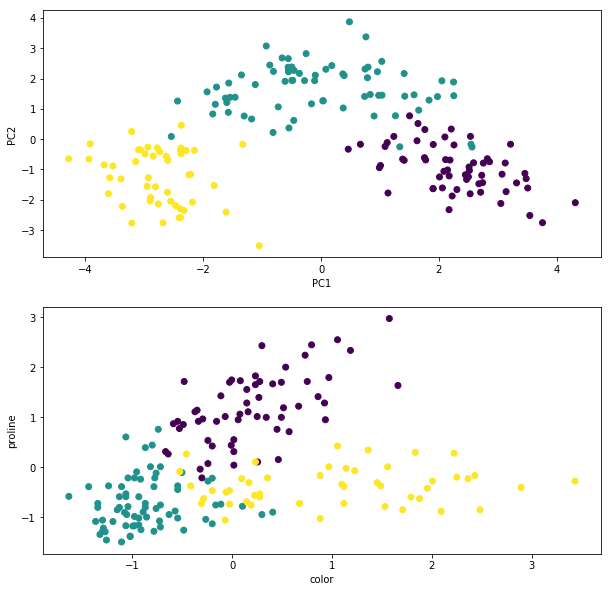

In [549]:
# 6: 結果をプロットする-----------------------------
%matplotlib inline
plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)
plt.scatter(X_transformed[:,0],X_transformed[:,1], c=Y)
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.subplot(2, 1, 2)
plt.scatter(X[:,9],X[:,12], c=Y)
plt.xlabel('color')
plt.ylabel('proline')
plt.show

## 線形回帰の一つ、LinerRegressionについて

In [550]:
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [551]:
dataset = load_breast_cancer()

data_x = pd.DataFrame(dataset.data,columns=dataset.feature_names)
data_y = pd.DataFrame(dataset.target, columns = ['y'])

In [552]:
data_x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [553]:
data_x.shape

(569, 30)

In [554]:
train_x,test_x,train_y,test_y = train_test_split(data_x,data_y)  #defaulで80%をtrain setにしている

In [555]:
train_x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
499,20.59,21.24,137.80,1320.0,0.10850,0.16440,0.21880,0.11210,0.1848,0.06222,...,23.86,30.76,163.20,1760.0,0.1464,0.3597,0.5179,0.21130,0.2480,0.08999
134,18.45,21.91,120.20,1075.0,0.09430,0.09709,0.11530,0.06847,0.1692,0.05727,...,22.52,31.39,145.60,1590.0,0.1465,0.2275,0.3965,0.13790,0.3109,0.07610
361,13.30,21.57,85.24,546.1,0.08582,0.06373,0.03344,0.02424,0.1815,0.05696,...,14.20,29.20,92.94,621.2,0.1140,0.1667,0.1212,0.05614,0.2637,0.06658
253,17.30,17.08,113.00,928.2,0.10080,0.10410,0.12660,0.08353,0.1813,0.05613,...,19.85,25.09,130.90,1222.0,0.1416,0.2405,0.3378,0.18570,0.3138,0.08113
282,19.40,18.18,127.20,1145.0,0.10370,0.14420,0.16260,0.09464,0.1893,0.05892,...,23.79,28.65,152.40,1628.0,0.1518,0.3749,0.4316,0.22520,0.3590,0.07787


<function matplotlib.pyplot.show(*args, **kw)>

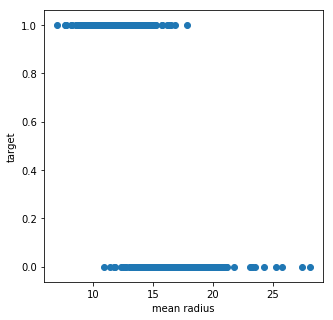

In [556]:
plt.figure(figsize=(5,5))
plt.scatter(train_x.iloc[:,0],train_y)
plt.xlabel('mean radius')
plt.ylabel('target')

plt.show

In [557]:
model = LinearRegression()  #線形回帰モデルの呼び出し
model.fit(train_x, train_y)  #モデルの訓練

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [558]:
print(model.coef_)  #回帰変数の表示（Coefficient の略で、これは係数という意味）
print(model.intercept_)  #回帰直線の切片（interceptは数学で切片の意味）
print(model.get_params())  #パラメータの取得

[[ 3.22041376e-01 -6.67647435e-03 -3.51181514e-02 -5.06299483e-04
  -6.45710896e-01  4.86737884e+00 -1.38669606e+00 -2.45805738e+00
   4.06149591e-01 -6.65149475e-01 -2.99976532e-01 -8.53866456e-03
  -3.96041239e-03  1.32138021e-03 -1.66309657e+01 -1.40086213e+00
   3.59724182e+00 -1.19162739e+01  2.03587875e+00  7.70223877e+00
  -2.31986252e-01 -5.70268553e-03  4.18356134e-03  1.11145227e-03
  -1.88506549e-01 -1.56331712e-01 -3.52345953e-01  2.23004264e-01
  -1.09049319e+00 -3.00653325e+00]]
[2.92463232]
{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}


In [559]:
y_pred = model.predict(test_x)  #予測値の表示
y_pred[100:110]

array([[ 1.11770345],
       [ 1.15299273],
       [ 0.44064161],
       [ 0.892323  ],
       [ 0.62611759],
       [-0.06470997],
       [ 0.69260887],
       [ 0.15086197],
       [ 0.28834614],
       [ 0.91396203]])

In [560]:
y_score = model.score(test_x,test_y)  #決定係数の表示
y_score

0.7708524988271718

In [561]:
test_y.iloc[100:110,0]

431    1
294    1
379    0
289    1
225    1
45     0
552    1
533    0
501    0
67     1
Name: y, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

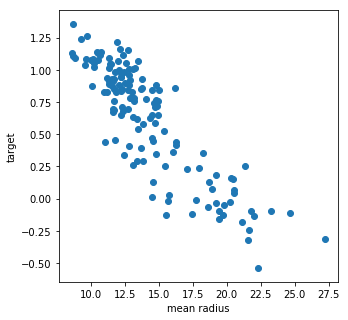

In [562]:
plt.figure(figsize=(5,5))
plt.scatter(test_x.iloc[:,0], y_pred)   # scatterは DataFrame でもnp.array　でもどちらでも良い。混ぜてもworkする。
plt.xlabel('mean radius')
plt.ylabel('target')

plt.show

In [563]:
## 標準化したら？

## xgboost DMatrix　の使い方

In [14]:
%matplotlib inline
import numpy as np
import xgboost as xgb
from sklearn import datasets
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [6]:
iris = datasets.load_iris()

features = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
dm = xgb.DMatrix(iris.data, label=iris.target, feature_names=features)
dm.feature_names

['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']

In [7]:
type(dm)

xgboost.core.DMatrix

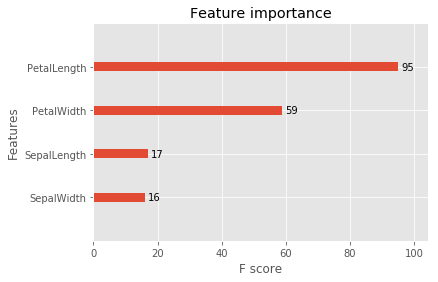

In [8]:
params={'objective': 'multi:softprob',
        'eval_metric': 'mlogloss',
        'eta': 0.3,
        'num_class': 3}

np.random.seed(1)
bst = xgb.train(params, dm, num_boost_round=18)
xgb.plot_importance(bst)

In [25]:
df = pd.DataFrame([[1, 0.1, False], [2, 0.2, True], [2, 0.2, False]],
                  columns=['A', 'B', 'C'])
df

,A,B,C
0,1,0.1,False
1,2,0.2,True
2,2,0.2,False


In [29]:
dm = xgb.DMatrix(df)
print(dm.feature_types, dm.feature_names)

['int', 'float', 'i'] ['A', 'B', 'C']


In [17]:
pd.set_option('display.max_rows', 8)
train = pd.DataFrame(iris.data, columns=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'])
train

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
...,...,...,...,...
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [18]:
dm = xgb.DMatrix(train, label=iris.target)

In [22]:
print(dm.feature_names,'\n',dm.feature_types)

['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'] 
 ['float', 'float', 'float', 'float']


In [30]:
train = pd.DataFrame(iris.data, columns=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'])
dm = xgb.DMatrix(train, label=iris.target)

cv = xgb.cv(params, dm, num_boost_round=50, nfold=10)
cv

,train-mlogloss-mean,train-mlogloss-std,test-mlogloss-mean,test-mlogloss-std
0,0.737631,0.003818,0.753459,0.027033
1,0.526929,0.005102,0.552303,0.048738
2,0.390115,0.005873,0.423481,0.066469
3,0.295637,0.006148,0.339942,0.082163
...,...,...,...,...
46,0.018070,0.001759,0.208001,0.259161
47,0.017898,0.001724,0.208355,0.261166
48,0.017755,0.001703,0.208468,0.261520
49,0.017617,0.001686,0.208566,0.260967


## Iris　分類問題 softmax関数使ったよ

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
 

Using TensorFlow backend.


In [2]:
np.random.seed(0) # 乱数を固定値で初期化し再現性を持たせる

iris = datasets.load_iris()
X = iris.data
T = iris.target
 
T = np_utils.to_categorical(T) # 数値を、位置に変換 [0,1,2] ==> [ [1,0,0],[0,1,0],[0,0,1] ]
train_x, test_x, train_t, test_t = train_test_split(X, T, train_size=0.8, test_size=0.2) # 訓練とテストで分割

In [ ]:
model = Sequential()
model.add(Dense(input_dim=4, units=3))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.1))

In [ ]:
model.fit(train_x, train_t, epochs=50, batch_size=10)

In [ ]:
Y = model.predict_classes(test_x, batch_size=10)

In [ ]:
_, T_index = np.where(test_t > 0) # to_categorical の逆変換
print()
print('RESULT')
print(Y == T_index)

# fashion-MNIST  how to argument data

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

data_train = pd.read_csv('fashion-mnist_train.csv')
data_test = pd.read_csv('fashion-mnist_test.csv')

In [3]:
from keras.utils import to_categorical

X = np.array(data_train.iloc[:, 1:])
y = to_categorical(np.array(data_train.iloc[:, 0]))

shuffle_index = np.random.permutation(60000)
X, y = X[shuffle_index], y[shuffle_index]

X_test = np.array(data_test.iloc[:, 1:])
y_test = to_categorical(np.array(data_test.iloc[:, 0]))

Using TensorFlow backend.


In [242]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)

In [243]:
from scipy.ndimage.interpolation import shift

In [244]:
def shift_image(image, dx, dy):
    image = image.reshape(28, 28)
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape(-1)

In [248]:
image = X_train[1000]
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5, 0)

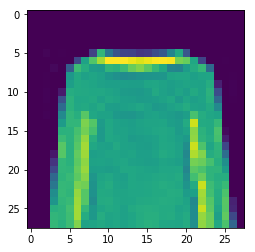

In [249]:
import matplotlib.pyplot as plt
plt.imshow(shifted_image_down.reshape(28,28), cmap='viridis')

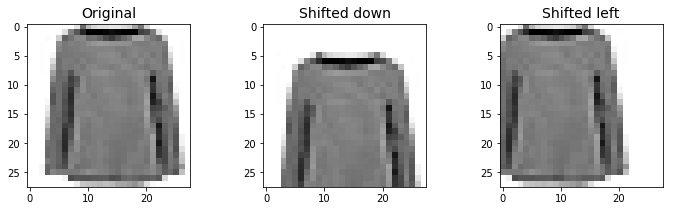

In [250]:
plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted down", fontsize=14)
plt.imshow(shifted_image_down.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted left", fontsize=14)
plt.imshow(shifted_image_left.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.show()

In [252]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]
print(len(X_train_augmented)) # listの中に48000のarray(784,)が入っている。
print(len(y_train_augmented))# listの中に48000のarray(10,)が入っている。

48000
48000


In [253]:
for dx, dy in ((3, 0), (-3, 0), (0, 3), (0, -3)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [254]:
X_train_augmented.shape   # 48000*5個のarrayが入っている

(240000, 784)

In [255]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [256]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest_clf = RandomForestClassifier(random_state=42)
cross_val_score(forest_clf, X_train_augmented, y_train_augmented, cv=5, 
                scoring="accuracy")

array([0.7461875 , 0.7435625 , 0.743     , 0.74514583, 0.74254167])

結論：shift(1)で動かし、水増ししたら1%ほど精度が上がった。（データ数5倍にしたのに1%は少ない。）

shift(3)で動かし、水増ししたら3%ほど精度が下がった。（動かしすぎると悪影響。）

# ImageDataGenerator 使い方
https://qiita.com/halspring/items/7692504afcba97ece249
http://aidiary.hatenablog.com/entry/20161212/1481549365

In [52]:
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array, array_to_img

In [232]:
generator = ImageDataGenerator(
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=2,
#    zoom_range=0.5
#   rotation_range=90
                        )

In [233]:
temp = X_train[:3]

In [234]:
temp.shape

(3, 784)

In [235]:
x = np.expand_dims(temp.reshape(3,28,28), axis=0)
x.shape

(1, 3, 28, 28)

In [236]:
g = generator.flow(x, batch_size=1)
bach = []
for i in range(6):
    bach.append(g.next())

In [237]:
bach[0].shape

(1, 3, 28, 28)

In [238]:
x.shape

(1, 3, 28, 28)

In [239]:
bach[0][0].shape

(3, 28, 28)

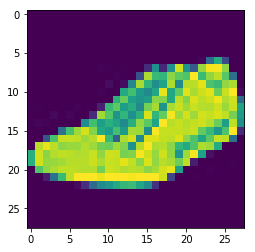

In [240]:
plt.imshow(x[0][0], cmap='viridis')

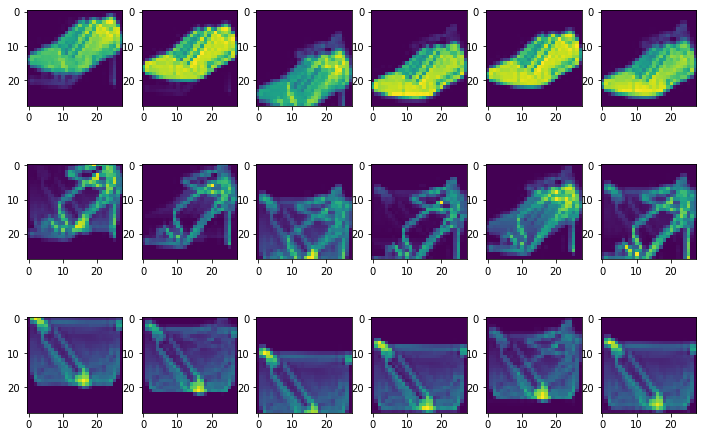

In [241]:
plt.ﬁgure(2, ﬁgsize=(12, 8))
a = 0
for i in range(3):
    for j in range(6):
        a += 1
        plt.subplot(3, 6, a)
        plt.imshow(bach[j][0][i], cmap='viridis')